width: 2121 height: 1547
79,57%

79,42%

83,80%

83,21%

84,96%

83,70%

93,81%

95,92%

84,52%

82,52%

90,85%

88,99%

90,38%

89,47%

86,31%

85,02%

91,82%

91,41%

87,61%

86,76%

87,94%

86,07%

86,16%

84,25%

88,03%

86,83%



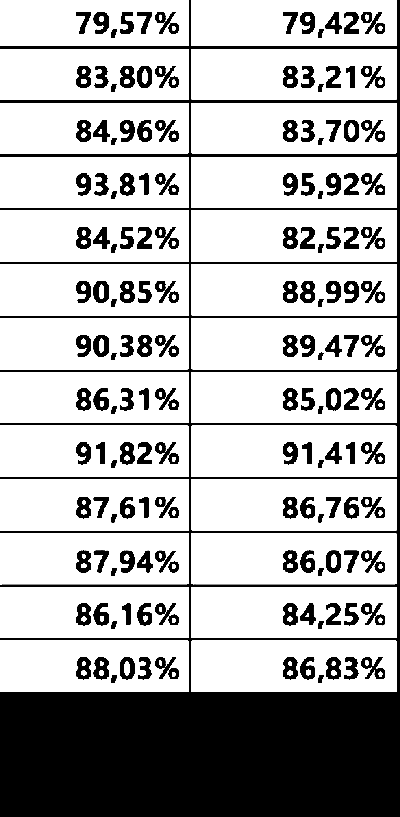

In [1]:
import io
import fitz
import numpy as np
from PIL import Image, ImageOps, ImageFilter, ImageEnhance
import pytesseract

zoom = 4
mat = fitz.Matrix(zoom, zoom)
config = r'--oem 3 --psm 12 -c tessedit_char_whitelist=0123456789,%'

def read2(file, pageNumber):
    pdf = fitz.open(file)
    page = pdf.load_page(pageNumber)
    pixmap = page.get_pixmap(alpha=False, matrix=mat).tobytes()
    image = Image.open(io.BytesIO(pixmap))
    invert_im = image.convert("RGB")
    invert_im = ImageOps.invert(invert_im)
    imageBox = invert_im.getbbox()
    cropped = image.crop(imageBox)
    aspect_ratio = cropped.height / cropped.width
    new_width = 2121
    new_height = int(new_width * aspect_ratio)
    resized = cropped.resize((new_width, new_height), Image.NEAREST)
    print('width:', resized.width, 'height:', resized.height)
    
    image_arr = np.array(resized)

    # Crop image
    image_arr = image_arr[730:image.height, 1500:1900]

    # Convert array to image
    image = Image.fromarray(image_arr)
    im2 = image.convert('L')
    im2 = im2.filter(ImageFilter.MinFilter(1))
    im2 = im2.filter(ImageFilter.SMOOTH_MORE)
    #im2 = im2.filter(ImageFilter.SMOOTH_MORE)
    enhancer = ImageEnhance.Contrast(im2)
    im2 = enhancer.enhance(5)
    #im2 = im2.filter(ImageFilter.SHARPEN)
    im2 = im2.filter(ImageFilter.SHARPEN)
    im2 = im2.filter(ImageFilter.MinFilter(1))
    im2 = ImageOps.invert(im2)
    enhancer = ImageEnhance.Brightness(im2)
    im2 = enhancer.enhance(3)
    results = pytesseract.image_to_string(im2, config=config)
    print(results)
    display(im2)

read2('./data/report.pdf', 6)